In [1]:
#importaciones de las librerias
import numpy as np
import pandas as pd
from IPython.core import display as disp
import matplotlib.pyplot as plt

In [2]:
dataorig=pd.read_csv("ozone.csv")#Leemos el fichero csv
dataorig

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,12,23,4,3.21,5680,4,57,47,45.32,508,-10,58.64,100
199,12,27,1,1.74,5730,3,53,51,49.28,111,-14,72.50,200
200,12,28,2,2.69,5690,3,23,51,49.28,5000,-36,51.26,70
201,12,29,3,5.05,5650,3,61,50,46.58,3704,18,46.94,40


In [3]:
data=dataorig[['Wind_speed','ozone_reading','Visibility']]

# 1. Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading, Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos obtenidos en cada caso.

Para detectar los outliers se utilizara el mismo metodo que utiliza boxplot para representar dicho outliers.
Por ello el grafico que se tiene que utilizar es el boxplot.

In [4]:
#Metemos las variables en un array por comodidad.
variables=['Wind_speed','ozone_reading','Visibility']

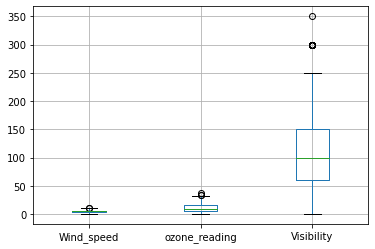

In [5]:
#Mostramos un boxplot de las 3 variables
boxplot = data.boxplot(column=['Wind_speed','ozone_reading','Visibility'])

Dado que utilizando este grafico no se pueden ver con claridad los valores de las variables de wind_speed y ozone reading. Se mostrara de manera individual.

Boxplot de la variable:  Wind_speed


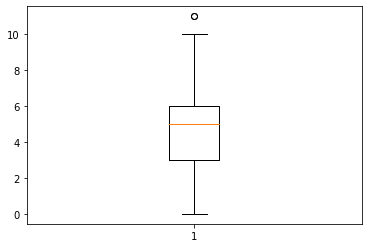

Boxplot de la variable:  ozone_reading


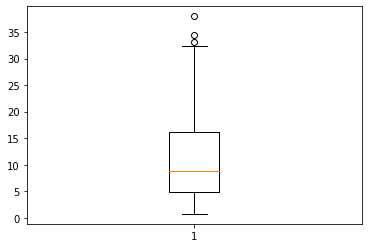

Boxplot de la variable:  Visibility


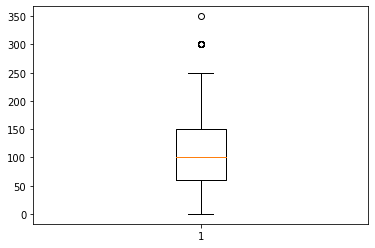

In [6]:
#Mostramos boxplot de todas las variables.
for var in variables:
    print('Boxplot de la variable: ',var)
    box=data[var]
    plt.boxplot(box)
    plt.show()

In [7]:
#Creamos funcion que imprime el boxplot
#Ademas de una breve explicacion con los datos de los cuartiles
# y los outliers.
def funboxplot(dataframe,variable):
    print('BOXPLOT DE LA VARIABLE: ',variable.upper())
    #se muestran los cuartiles
    descr=dataframe.describe()
    print(descr)
    #se muestra el boxplot
    box=dataframe
    plt.boxplot(box)
    plt.show()
    #Funcion que detecta los outliers
    array2=detectaroutliers(dataframe)
    #Explicacion
    print('Podemos ver que la mayoria de los datos sobre la variable ' + variable + ' se encuentran entre el numero '
          + str(descr['25%'])+ ' y el numero '+ str(descr['50%'])+' que corresponden al primer y al segundo cuartil respectivamente,el tercer cuartil corresponde con el numero '+str(descr['75%'])+ ' podemos ver que el valor maximo es '
          +str(descr['max'])+' y que el valor minimo es '+str(descr['min'])+' los outliers en este caso son: '+str(array2)+'\n')

In [8]:
#Funcion que indica los valores outliers del dataframe que se le pasa
#para ello se realiza de la misma forma que lo reliza el boxplot
#,es decir, con el rango intercuartilico.
def detectaroutliers(dataframe):
    #Creamos el describe para utilizar los datos de los cuartiles
    describee=dataframe.describe()
    #Primer cuartil
    cuartil1 = describee['25%']
    #Tercer cuartil
    cuartil3 = describee['75%']
    #calculamos el rango intercuartilico
    iqr = cuartil3 - cuartil1
    #Seleccionamos las rows que superen el rango intercuartilico por arriba o por abajo
    #Esto devuelve dataframe con el indice de las rows como index y como valores los outliers
    dataframeoutliers=dataframe.loc[(dataframe < (cuartil1-1.5*iqr))|(dataframe > (cuartil3+1.5*iqr))]
    #Cogemos los valores del dataframe
    #nos quedamos con los valores unicos, es decir, que no se repitan valores.
    array=np.unique(dataframeoutliers.values)    
    return array

BOXPLOT DE LA VARIABLE:  WIND_SPEED
count    203.000000
mean       4.866995
std        2.105402
min        0.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: Wind_speed, dtype: float64


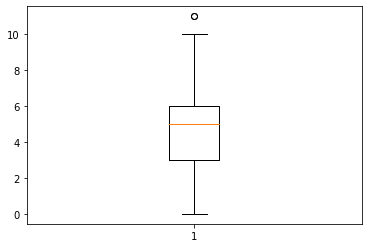

Podemos ver que la mayoria de los datos sobre la variable Wind_speed se encuentran entre el numero 3.0 y el numero 5.0 que corresponden al primer y al segundo cuartil respectivamente,el tercer cuartil corresponde con el numero 6.0 podemos ver que el valor maximo es 11.0 y que el valor minimo es 0.0 los outliers en este caso son: [11]

BOXPLOT DE LA VARIABLE:  OZONE_READING
count    203.000000
mean      11.373990
std        8.192652
min        0.720000
25%        4.770000
50%        8.900000
75%       16.075000
max       37.980000
Name: ozone_reading, dtype: float64


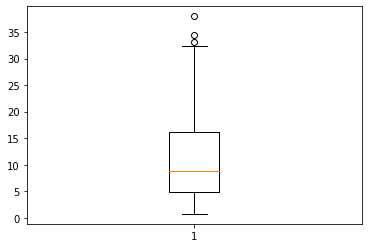

Podemos ver que la mayoria de los datos sobre la variable ozone_reading se encuentran entre el numero 4.77 y el numero 8.9 que corresponden al primer y al segundo cuartil respectivamente,el tercer cuartil corresponde con el numero 16.075 podemos ver que el valor maximo es 37.98 y que el valor minimo es 0.72 los outliers en este caso son: [33.04 34.39 37.98]

BOXPLOT DE LA VARIABLE:  VISIBILITY
count    203.000000
mean     122.197044
std       81.171317
min        0.000000
25%       60.000000
50%      100.000000
75%      150.000000
max      350.000000
Name: Visibility, dtype: float64


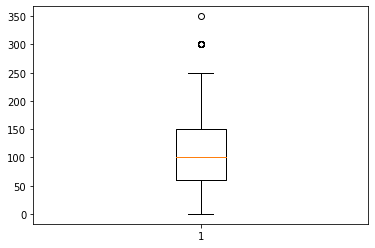

Podemos ver que la mayoria de los datos sobre la variable Visibility se encuentran entre el numero 60.0 y el numero 100.0 que corresponden al primer y al segundo cuartil respectivamente,el tercer cuartil corresponde con el numero 150.0 podemos ver que el valor maximo es 350.0 y que el valor minimo es 0.0 los outliers en este caso son: [300 350]



In [9]:
for i in range(0,len(variables)):
    funboxplot(data[variables[i]],variables[i])
    

Podemos ver como el valor de los outliers coincide con la representacion en el boxplot.

# 2.Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y “Visibility”.

Entiendo que en este apartado se busca que coincida el valor del outlier de Windspeed con el valor del outlier de Visibility, para ello haremos uso de los conjuntos.

In [10]:
variables#Para recordar en que posicion estan las variables.

['Wind_speed', 'ozone_reading', 'Visibility']

In [11]:
#Selecciono los outliers de cada variable
outliers0=detectaroutliers(data[variables[0]])
outliers1=detectaroutliers(data[variables[2]])

Entiende que en este apartado se pide la probabilidad de la union y la interseccion de sucesos para ello haremos uso de los conjuntos.

In [12]:
#Creo un conjunto con los valores outliers de cada conjunto
variable1=set(outliers0)
variable2=set(outliers1)

In [13]:
#Union de ambos conjuntos
unionconjuntos=variable1.union(variable2)
unionconjuntos

{11, 300, 350}

In [14]:
#Interseccion conjuntos
interseccionconjuntos=variable1.intersection(variable2)
interseccionconjuntos

set()

Como podemos ver la interseccion esta vacia, esto se debe a que no hay valores iguales en ambos conjuntos.

Busqueda de los datos en el dataframe.

In [15]:
outliers0#OUTLIERS Wind_speed

array([11])

In [16]:
outliers1#OUTLIERS Visibility

array([300, 350])

In [17]:
data[(data['Wind_speed']==11)]

,Wind_speed,ozone_reading,Visibility
22,11,2.92,350
36,11,2.79,200


Podemos ver que el metodo de los conjuntos no es eficiente dado que en este caso el dataframe tiene una columna donde coincide el valor del outlier de Wind_speed con un valor de los outliers de Visibility

# 3. Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan relacionar diferentes variables ¿Qué nos dicen los datos?

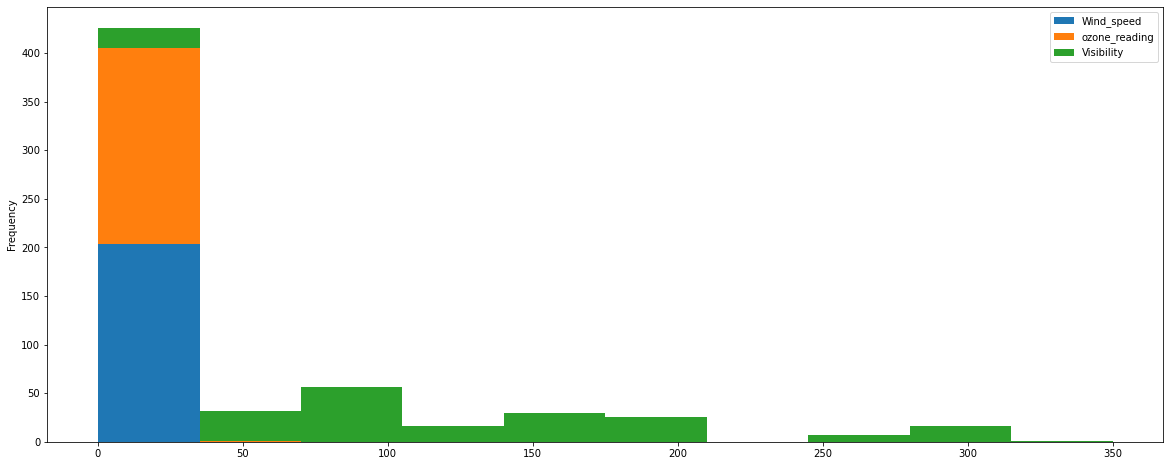

In [18]:
data.plot.hist(stacked=True, figsize=(20,8));

Como podemos ver en este histograma los valores de las variables wind_speed y ozone_reading con los datos dados son muy similares, sin embargo, los valores de la variable visibility abarcan un gran rango de valores.

In [19]:
#Categorizamos la variable visbility segun los cuartiles.
descr=data['Visibility'].describe()
conditionlist = [
    (data['Visibility'] >= descr['min']) & (data['Visibility'] <=descr['25%']),
    (data['Visibility'] > descr['25%']) & (data['Visibility'] <=descr['50%']),
    (data['Visibility'] > descr['50%']) & (data['Visibility'] <=descr['75%']),
    (data['Visibility'] > descr['75%'])]
choicelist = ['muypoca_visibilidad','poca_visibilidad','buena_visibilidad','muybuena_visibilidad']
data['Visibility'] = np.select(conditionlist, choicelist, default='Not Specified')
data

<ipython-input-19-75eab9cde803>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Visibility'] = np.select(conditionlist, choicelist, default='Not Specified')


,Wind_speed,ozone_reading,Visibility
0,3,5.34,muypoca_visibilidad
1,4,5.77,muypoca_visibilidad
2,6,3.69,poca_visibilidad
3,3,3.89,muybuena_visibilidad
4,3,5.76,buena_visibilidad
...,...,...,...
198,4,3.21,poca_visibilidad
199,3,1.74,muybuena_visibilidad
200,3,2.69,poca_visibilidad
201,3,5.05,muypoca_visibilidad


<AxesSubplot:xlabel='Visibility'>

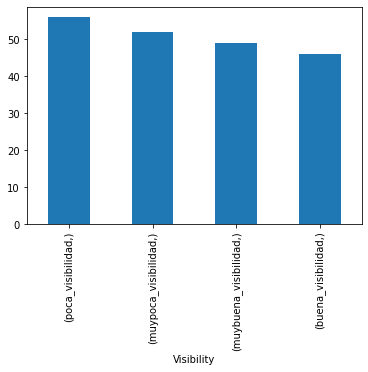

In [20]:
#Podemos ver que los datos estan balanceados.
data[['Visibility']].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Visibility'>

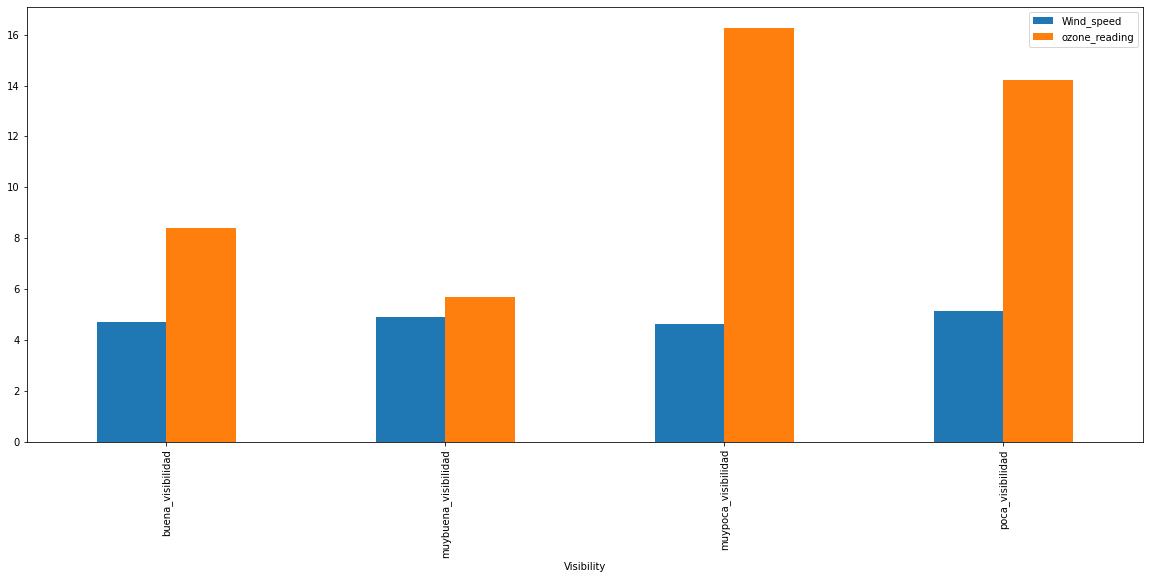

In [21]:
#Agrupamos las otras dos variables segun la visibilidad
data.groupby(by=["Visibility"]).mean().plot(kind='bar',figsize=(20,8))

* Con este grafico podemos  inferir que los dias que hay poca o muy poca visibilidad son aquellos dias que las lecturas de ozono son mas altas. De la misma forma los dias que hay buena o muy buena visibilidad seran aquellos dias que las lecturas de ozono seran mas bajas.
* La variable windspeed parece estable, es decir, es independiente de la visibilidad.

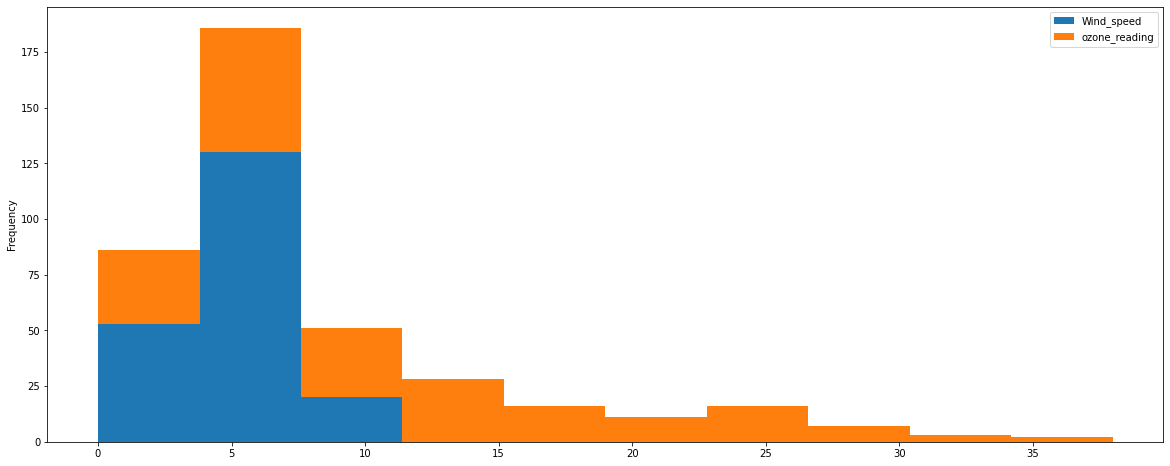

In [22]:
#Histograma tras categorizar datos.
data.plot.hist(stacked=True, figsize=(20,8));

En este histograma podemos ver que los valores de wind_speed ocupan muy rango muy pequeño de valores en comparacion con los valores de la variable ozone_reading, dado que la frecuencia con la que la variable wind tiene un valor pequeño es muy superior que la frecuencia que la variable ozone reading tiene un valor pequeño.

# 4.  Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.

Entiendo por principales variables las que se usan en los apartados anteriores, es decir, 'Wind_speed', 'ozone_reading', 'Visibility'.
Entiendo los dias de medicion los dias de la semana.

In [23]:
dataorig#dataset original

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,12,23,4,3.21,5680,4,57,47,45.32,508,-10,58.64,100
199,12,27,1,1.74,5730,3,53,51,49.28,111,-14,72.50,200
200,12,28,2,2.69,5690,3,23,51,49.28,5000,-36,51.26,70
201,12,29,3,5.05,5650,3,61,50,46.58,3704,18,46.94,40


In [24]:
#Seleccionamos las variables que vamos a utilizar
data=dataorig[['Wind_speed', 'ozone_reading', 'Visibility','Day_of_week']]

<AxesSubplot:ylabel='Frequency'>

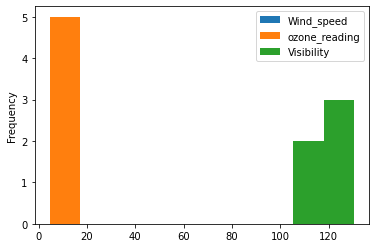

In [25]:
#Agrupamos las otras dos variables segun el dia de la semana
data.groupby(by=["Day_of_week"]).mean().plot.hist()

Utilizamos un histograma dado que mediante este podemos ver la distribucion y la frecuencia de los valores de las distintas variables.
Si ademas agrupamos los valores segun los dias de medicion y representamos la media de estos dias resolvemos el ejercicio.
Los valores de las variables Windspeed y ozone reading son los mismos por eso no quedan representados porque un color esta encima del otro.

<AxesSubplot:ylabel='Frequency'>

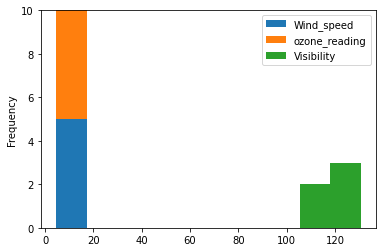

In [26]:
#Agrupamos las otras dos variables segun el dia de la semana
data.groupby(by=["Day_of_week"]).mean().plot.hist(stacked=True)

Esta ultima representacion sirve para clarificar que los valores de la variables wind_speed y ozone_reading son los mismos por eso no se pueden ver en la grafica anterior.

# Referencias
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/#:~:text=Back%20to%20Top-,How%20to%20Read%20a%20Box%20Plot,(the%2075%25%20mark).
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.union.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.intersection.html